In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\saika\\Downloads\\datasets\\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


- first we convert the data type from object to date time

In [6]:
# we hyave to type cast to it

df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [12]:
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [16]:
df['days in week']=df['order_placed_at'].dt.day_name()

In [17]:
df.head()

,order_id,order_placed_at,order_delivered_at,days in week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday


In [21]:
df['delivery time']=df['order_delivered_at']-df['order_placed_at']

In [25]:
df['delivery time']=df['delivery time'].dt.total_seconds()/60

In [26]:
df.head()

,order_id,order_placed_at,order_delivered_at,days in week,time,delivery time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,-1 days +23:42:51.556868,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,-1 days +23:44:24.074759,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,-1 days +23:44:53.708615,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,-1 days +23:21:27.980601,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,-1 days +23:43:49.380944,16.176984


In [27]:
df.drop(['time'],axis=1,inplace=True)

In [28]:
df.head()

,order_id,order_placed_at,order_delivered_at,days in week,delivery time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,16.176984


- now we do univariate analysis for each column

<AxesSubplot:>

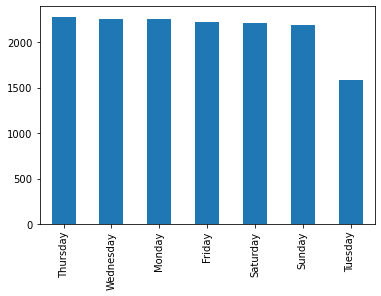

In [38]:
df['days in week'].value_counts().plot(kind='bar')

- from the above observation most of the deliverys thursday and least delivers in tuesday
  because in march tuesday was came  three times only.

In [41]:
# now findout the mean and median
#similarily we also find quantiles

print(df['delivery time'].mean())
df['delivery time'].median()

## from below mean and median value tell about the outlier.

20.499389326467746


15.797986066666668

In [44]:
# now we check the quantiles
print(df['delivery time'].quantile(0.25))
print(df['delivery time'].quantile(0.75))
print(df['delivery time'].quantile(0.95))

15.274825995833334
17.27966090416667
27.261043996666658


- from above observation 95 times the pizza delivered before 31 minutes

<AxesSubplot:>

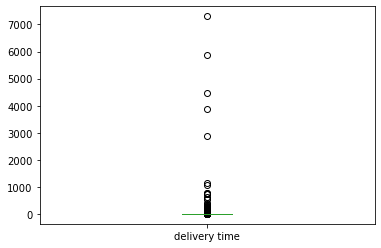

In [45]:
# now we check the ouliers

df['delivery time'].plot(kind='box')

In [46]:
# from above graph there is a some ouliers 
df1=df[df['delivery time']<31]

<AxesSubplot:>

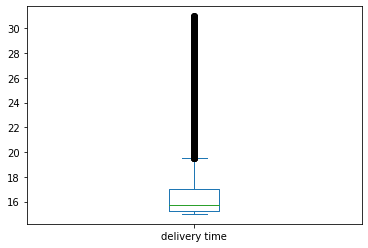

In [47]:
df1['delivery time'].plot(kind='box')

In [50]:
print(df1.shape)
print(df.shape)

(14443, 5)
(15000, 5)


- for cosidering two dataset shapes,there is loss of data which is 557

## final observations

- most of the deliverys placed in thursday
- Least delivers placed in tuesday, because tuesday only occured 3 times in march
- All delivers donot delivered at a time.
- And there is a loss of data which means the client loss pizas(557)
- 95 times the pizza delivered before 31 minutes.
- The avg delivery time was 20.41 minutes

# suggestions for clients

- Speed up your delivery time.
- keep it up orders like this.
- Reamining will be perfect